## Applying Logistic Regression Model to 2017 Data ##

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import iqr
from sklearn import preprocessing
import pickle
from sklearn.preprocessing import MinMaxScaler

D:\Python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Loading 2017 data
data = pd.read_csv("2017_Data.csv", header=0, index_col=0)
data.head()

,Year,Assigned_ID,Bank,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType
0,2017,2092102,Atlanta,3.2928,71967,0.89,2016,2,2,1,2,1,0.1118,0.2265,5,1
1,2017,2092103,Atlanta,4.0513,514837,0.94,2016,2,2,1,2,1,0.1446,0.2370,5,1
2,2017,2092104,Atlanta,2.2109,425563,1.04,2016,1,2,1,2,1,0.2312,0.3152,5,1
3,2017,2092105,Atlanta,2.3403,251800,0.75,2016,2,2,1,2,1,0.1657,0.3430,4,7
4,2017,2092106,Atlanta,1.0537,290613,0.85,2016,2,2,1,2,1,0.4062,0.4224,3,1


In [3]:
# Splitting data into target/data variables

data_year = data.Year
data_assigned = data.Assigned_ID
data_bank = data.Bank
data_mortdate = data.MortDate
data = data.drop(columns=['Year','Assigned_ID','Bank','MortDate'], axis=1)

In [4]:
# Checking data
data.head()

,IncRat,UPB,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType
0,3.2928,71967,0.89,2,2,1,2,1,0.1118,0.2265,5,1
1,4.0513,514837,0.94,2,2,1,2,1,0.1446,0.2370,5,1
2,2.2109,425563,1.04,1,2,1,2,1,0.2312,0.3152,5,1
3,2.3403,251800,0.75,2,2,1,2,1,0.1657,0.3430,4,7
4,1.0537,290613,0.85,2,2,1,2,1,0.4062,0.4224,3,1


#### Outliers ####

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7268765c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a726876e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a726876048>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7268856a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a726885ac8>],
 'means': []}

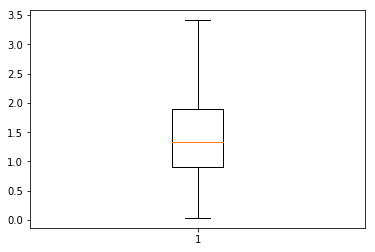

In [5]:
# Defining the function 'iqr_outliers' to help with outliers

def iqr_outliers(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

Q1 = data['IncRat'].quantile(0.25)
Q3 = data['IncRat'].quantile(0.75)
IQR = iqr(data['IncRat'])
data['IncRat']=data['IncRat'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.IncRat)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a727213860>,
 'caps': [<matplotlib.lines.Line2D at 0x1a727213d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7272132e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a72720b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a72720bd68>],
 'means': []}

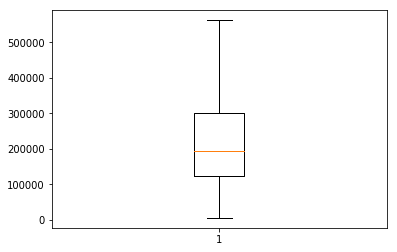

In [6]:
Q1 = data['UPB'].quantile(0.25)
Q3 = data['UPB'].quantile(0.75)
IQR = iqr(data['UPB'])
data['UPB']=data['UPB'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.UPB)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a726922f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a726918be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a726922dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a72690d470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a72690d898>],
 'means': []}

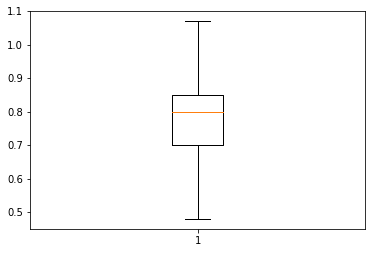

In [7]:
Q1 = data['LTV'].quantile(0.25)
Q3 = data['LTV'].quantile(0.75)
IQR = iqr(data['LTV'])
data['LTV']=data['LTV'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.LTV)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a726983cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a72698d9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a726983ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a72698deb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a726995668>],
 'means': []}

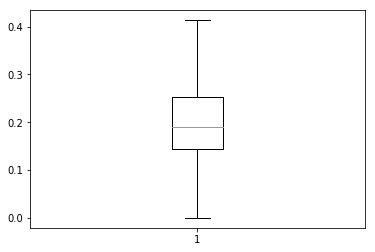

In [8]:
Q1 = data['Front'].quantile(0.25)
Q3 = data['Front'].quantile(0.75)
IQR = iqr(data['Front'])
data['Front']=data['Front'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.Front)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a727158f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a727165be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a727158dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a727168470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a727168898>],
 'means': []}

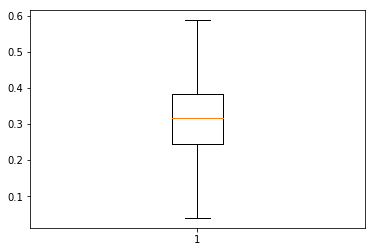

In [9]:
Q1 = data['Back'].quantile(0.25)
Q3 = data['Back'].quantile(0.75)
IQR = iqr(data['Back'])
data['Back']=data['Back'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.Back)

#### Normalization ####

In [10]:
# Checking the mean of the data
data.mean()

IncRat               1.419254
UPB             217952.062725
LTV                  0.787325
Purpose              1.412645
Coop                 2.000000
Product              1.000000
FedGuar              0.199679
Occup                1.022897
Front                0.201148
Back                 0.312918
BoCreditScor         4.353724
PropType             2.252277
dtype: float64

In [11]:
# Moving features to another variable
features_no = data.filter(['IncRat','LTV','Purpose','Coop','Product','FedGuar','Occup','Front','Back','BoCreditScor','PropType'], axis=1)

# Dropping other variables
data = data.drop(['IncRat','LTV','Purpose','Coop','Product','FedGuar','Occup','Front','Back','BoCreditScor','PropType'], axis=1)

# Creating a new variable for columns
new_cols = ['UPB']

# Normalizing using MinMax
minmax = preprocessing.MinMaxScaler()
normal_data = (minmax.fit_transform(data))
normal_data = pd.DataFrame(normal_data, columns=new_cols)

In [12]:
# Checking normal_data mean
normal_data.mean()

UPB    0.381208
dtype: float64

In [13]:
data = pd.concat([features_no, normal_data], axis=1, join='inner')
print(data.head())

   IncRat   LTV  Purpose  Coop  Product  FedGuar  Occup   Front    Back  \
0  3.2928  0.89        2     2        1        2      1  0.1118  0.2265   
1  1.9031  0.94        2     2        1        2      1  0.1446  0.2370   
2  2.2109  1.04        1     2        1        2      1  0.2312  0.3152   
3  2.3403  0.75        2     2        1        2      1  0.1657  0.3430   
4  1.0537  0.85        2     2        1        2      1  0.4062  0.4224   

   BoCreditScor  PropType       UPB  
0             5         1  0.119025  
1             5         1  0.914399  
2             5         1  0.754067  
3             4         7  0.441997  
4             3         1  0.511703  


#### Skewness ####

In [14]:
# Checking skewness
data.skew()

IncRat          0.624697
LTV            -0.160128
Purpose         0.429509
Coop            0.000000
Product         0.000000
FedGuar         3.321708
Occup           6.395588
Front           0.431211
Back           -0.108916
BoCreditScor   -0.867399
PropType        2.045434
UPB             0.752869
dtype: float64

__There is no skewness, as the attributes that have high skew are categorical variables.__

In [15]:
# Concatinating the dataframe back together

data = pd.concat([data, data_year], axis=1, join='inner')
data = pd.concat([data, data_bank], axis=1, join='inner')
data = pd.concat([data, data_mortdate], axis=1, join='inner')
data = pd.concat([data, data_assigned], axis=1, join='inner')
data.head()

,IncRat,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType,UPB,Year,Bank,MortDate,Assigned_ID
0,3.2928,0.89,2,2,1,2,1,0.1118,0.2265,5,1,0.119025,2017,Atlanta,2016,2092102
1,1.9031,0.94,2,2,1,2,1,0.1446,0.2370,5,1,0.914399,2017,Atlanta,2016,2092103
2,2.2109,1.04,1,2,1,2,1,0.2312,0.3152,5,1,0.754067,2017,Atlanta,2016,2092104
3,2.3403,0.75,2,2,1,2,1,0.1657,0.3430,4,7,0.441997,2017,Atlanta,2016,2092105
4,1.0537,0.85,2,2,1,2,1,0.4062,0.4224,3,1,0.511703,2017,Atlanta,2016,2092106


### Loading Logistic Regression Model Already Built ###

In [16]:
# Loading logistic regression model
logreg = pickle.load(open('logreg_model.p','rb'))

In [17]:
# Attempt 1
pred_cols = list(data.columns.values)[:-4]

scaler = MinMaxScaler()
X_pred = scaler.fit(data[pred_cols]).transform(data[pred_cols])

predictions = pd.Series(logreg.predict(X_pred))
print(predictions.value_counts())

0    33687
1    22303
dtype: int64


In [18]:
data['Portfolio_Worthy'] = predictions
data.head()

,IncRat,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType,UPB,Year,Bank,MortDate,Assigned_ID,Portfolio_Worthy
0,3.2928,0.89,2,2,1,2,1,0.1118,0.2265,5,1,0.119025,2017,Atlanta,2016,2092102,0
1,1.9031,0.94,2,2,1,2,1,0.1446,0.2370,5,1,0.914399,2017,Atlanta,2016,2092103,0
2,2.2109,1.04,1,2,1,2,1,0.2312,0.3152,5,1,0.754067,2017,Atlanta,2016,2092104,1
3,2.3403,0.75,2,2,1,2,1,0.1657,0.3430,4,7,0.441997,2017,Atlanta,2016,2092105,0
4,1.0537,0.85,2,2,1,2,1,0.4062,0.4224,3,1,0.511703,2017,Atlanta,2016,2092106,0
